# San Francisco Housing Cost Analysis

In this assignment, you will perform fundamental analysis for the San Francisco housing market to allow potential real estate investors to choose rental investment properties.

In [1]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv
from panel.interact import interact

import warnings
warnings.filterwarnings('ignore')

In [7]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("MAPBOX_API_KEY")

## Load Data

In [2]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

neighborhood  sale_price_sqr_foot  housing_units  gross_rent
year                                                                  
2010      Alamo Square           291.182945         372560        1239
2010        Anza Vista           267.932583         372560        1239
2010           Bayview           170.098665         372560        1239
2010  Buena Vista Park           347.394919         372560        1239
2010  Central Richmond           319.027623         372560        1239

- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function.

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Use the min, max, and std to scale the y limits of the chart.



In [4]:
# Calculate the mean number of housing units per year (hint: use groupby) 
yearly_housing_units = sfo_data["housing_units"].groupby("year").mean()
yearly_housing_units

year
2010    372560
2011    374507
2012    376454
2013    378401
2014    380348
2015    382295
2016    384242
Name: housing_units, dtype: int64

In [5]:
# Save the dataframe as a csv file
yearly_housing_units.to_csv("yearly_housing_units.csv")

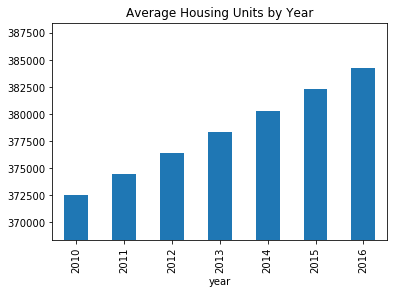

In [20]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.

# yearly_housing_units.plot.bar(title="Average Housing Units by Year")

# Optional Challenge: Use the min, max, and std to scale the y limits of the chart
yearly_housing_min = yearly_housing_units.min()
yearly_housing_max = yearly_housing_units.max()
yearly_housing_std = yearly_housing_units.std()
y_min = yearly_housing_min - yearly_housing_std
y_max = yearly_housing_max + yearly_housing_std

yearly_housing_units.plot.bar(title="Average Housing Units by Year", ylim=(y_min,y_max))

- - - 

## Average Housing Costs in San Francisco Per Year

In this section, you will calculate the average monthly rent and the average price per square foot for each year. An investor may wish to better understand the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property.  Plot the results as two line charts.

**Optional challenge:** Plot each line chart in a different color.

In [33]:
# Calculate the average sale price per square foot and average gross rent
yearly_prices = sfo_data.groupby("year").mean()
yearly_prices.drop(columns=["housing_units"],inplace=True)
yearly_prices

sale_price_sqr_foot  gross_rent
year                                 
2010           369.344353        1239
2011           341.903429        1530
2012           399.389968        2324
2013           483.600304        2971
2014           556.277273        3528
2015           632.540352        3739
2016           697.643709        4390

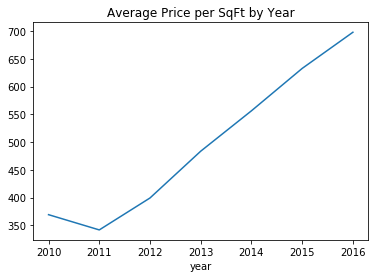

In [37]:
# Create two line charts, one to plot the average sale price per square foot and another for average montly rent

# Line chart for average sale price per square foot
yearly_prices["sale_price_sqr_foot"].plot.line(title="Average Price per SqFt by Year")


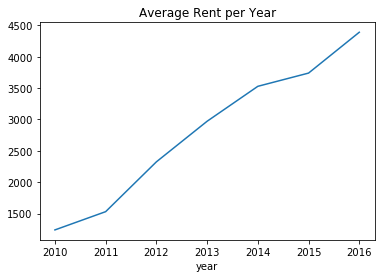

In [38]:
# Line chart for average montly rent
yearly_prices["gross_rent"].plot.line(title="Average Rent per Year")

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create two interactive visulizations of average prices with a dropdown selector for the neighborhood. The first visualization will be a line plot showing the trend of average price per square foot over time for each neighborhood.  The second will be a line plot showing the trend of average montly rent over time for each neighborhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [44]:
# Group by year and neighborhood and then create a new dataframe of the mean values
yearly_neighborhood_mean = sfo_data.groupby(["year","neighborhood"]).mean()
yearly_neighborhood_mean.head(10)

sale_price_sqr_foot  housing_units  gross_rent
year neighborhood                                                    
2010 Alamo Square               291.182945         372560        1239
     Anza Vista                 267.932583         372560        1239
     Bayview                    170.098665         372560        1239
     Buena Vista Park           347.394919         372560        1239
     Central Richmond           319.027623         372560        1239
     Central Sunset             418.172493         372560        1239
     Corona Heights             369.359338         372560        1239
     Cow Hollow                 569.379968         372560        1239
     Croker Amazon              165.645730         372560        1239
     Diamond Heights            456.930822         372560        1239

In [192]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood
yearly_neighborhood_mean["sale_price_sqr_foot"].hvplot.line(groupby="neighborhood",title="Average Yearly Sale Price per SqFt by Neighborhood")

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

In [58]:
# Use hvplot to create an interactive line chart of the average monthly rent.
# The plot should have a dropdown selector for the neighborhood
yearly_neighborhood_mean["gross_rent"].hvplot.line(groupby="neighborhood",title="Average Yearly Rent by Neighborhood")

:DynamicMap   [neighborhood]
   :Curve   [year]   (gross_rent)

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price per square foot for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [142]:
# Getting the data from the top 10 expensive neighborhoods to own
top_10_df = sfo_data.groupby("neighborhood").mean()
top_10_df.sort_values(by=["sale_price_sqr_foot"],ascending=False,inplace=True)
top_10_neighborhoods = top_10_df.nlargest(10,"sale_price_sqr_foot")
top_10_neighborhoods

sale_price_sqr_foot  housing_units   gross_rent
neighborhood                                                          
Union Square District           903.993258      377427.50  2555.166667
Merced Heights                  788.844818      380348.00  3414.000000
Miraloma Park                   779.810842      375967.25  2155.250000
Pacific Heights                 689.555817      378401.00  2817.285714
Westwood Park                   687.087575      382295.00  3959.000000
Telegraph Hill                  676.506578      378401.00  2817.285714
Presidio Heights                675.350212      378401.00  2817.285714
Cow Hollow                      665.964042      378401.00  2817.285714
Potrero Hill                    662.013613      378401.00  2817.285714
South Beach                     650.124479      375805.00  2099.000000

In [77]:
# Plotting the data from the top 10 expensive neighborhoods
top_10_neighborhoods["sale_price_sqr_foot"].hvplot.bar(
    title="Top 10 Most Expensive Neighborhoods in San Francisco",
    ylabel="Avg. Sale Price per SqFt",
    xlabel="Neighborhood",
    rot=90,
    width=800,
    height=400)

:Bars   [neighborhood]   (sale_price_sqr_foot)

- - - 

## Comparing cost to purchase versus rental income

In this section, you will use `hvplot` to create an interactive visualization with a dropdown selector for the neighborhood. This visualization will feature a side-by-side comparison of average price per square foot versus average montly rent by year.  

**Hint:** Use the `hvplot` parameter, `groupby`, to create a dropdown selector for the neighborhood.

In [78]:
# Fetch the previously generated DataFrame that was grouped by year and neighborhood
yearly_neighborhood_mean.head(10)

sale_price_sqr_foot  housing_units  gross_rent
year neighborhood                                                    
2010 Alamo Square               291.182945         372560        1239
     Anza Vista                 267.932583         372560        1239
     Bayview                    170.098665         372560        1239
     Buena Vista Park           347.394919         372560        1239
     Central Richmond           319.027623         372560        1239
     Central Sunset             418.172493         372560        1239
     Corona Heights             369.359338         372560        1239
     Cow Hollow                 569.379968         372560        1239
     Croker Amazon              165.645730         372560        1239
     Diamond Heights            456.930822         372560        1239

In [92]:
# Plotting data for gross rent vs average sale price per sqft
yearly_neighborhood_mean.hvplot.bar(
    y=["gross_rent","sale_price_sqr_foot"],
    x="year",
    ylabel="Price USD",
    xlabel="Year",
    title="Average Rent vs Sales Price per SqFt by Year",
    rot=90,
    groupby="neighborhood",
    height=400,
    width=600
)

:DynamicMap   [neighborhood]
   :Bars   [year,Variable]   (value)

- - - 

## Neighborhood Map

In this section, you will read in neighborhoods location data and build an interactive map with the average house value per neighborhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [95]:
# Load neighborhoods coordinates data
coord_path = Path("Data/neighborhoods_coordinates.csv")
coord_data = pd.read_csv(coord_path,index_col="Neighborhood")
coord_data.head()

Lat         Lon
Neighborhood                          
Alamo Square     37.791012 -122.402100
Anza Vista       37.779598 -122.443451
Bayview          37.734670 -122.401060
Bayview Heights  37.728740 -122.410980
Bernal Heights   37.728630 -122.443050

### Data Preparation

You will need to join the location data with the mean values per neighborhood.

1. Calculate the mean values for each neighborhood.

2. Join the average values with the neighborhood locations.

In [109]:
# Calculate the mean values for each neighborhood
neighborhood_df = sfo_data.groupby("neighborhood").mean()
neighborhood_df.reset_index(inplace=True)
neighborhood_df.rename(columns={"neighborhood":"Neighborhood"},inplace=True)
neighborhood_df.set_index("Neighborhood",inplace=True)
neighborhood_df.head()

sale_price_sqr_foot  housing_units   gross_rent
Neighborhood                                                    
Alamo Square              366.020712       378401.0  2817.285714
Anza Vista                373.382198       379050.0  3031.833333
Bayview                   204.588623       376454.0  2318.400000
Bayview Heights           590.792839       382295.0  3739.000000
Bernal Heights            576.746488       379374.5  3080.333333

In [131]:
# Join the average values with the neighborhood locations
neighborhood_coords = pd.concat([neighborhood_df,coord_data], axis="columns", join="inner")
neighborhood_coords.reset_index(inplace=True)
neighborhood_coords.head()

Neighborhood  sale_price_sqr_foot  housing_units   gross_rent  \
0      Alamo Square           366.020712       378401.0  2817.285714   
1        Anza Vista           373.382198       379050.0  3031.833333   
2           Bayview           204.588623       376454.0  2318.400000   
3   Bayview Heights           590.792839       382295.0  3739.000000   
4  Buena Vista Park           452.680591       378076.5  2698.833333   

         Lat         Lon  
0  37.791012 -122.402100  
1  37.779598 -122.443451  
2  37.734670 -122.401060  
3  37.728740 -122.410980  
4  37.768160 -122.439330

### Mapbox Visualization

Plot the average values per neighborhood using a Plotly express `scatter_mapbox` visualization.

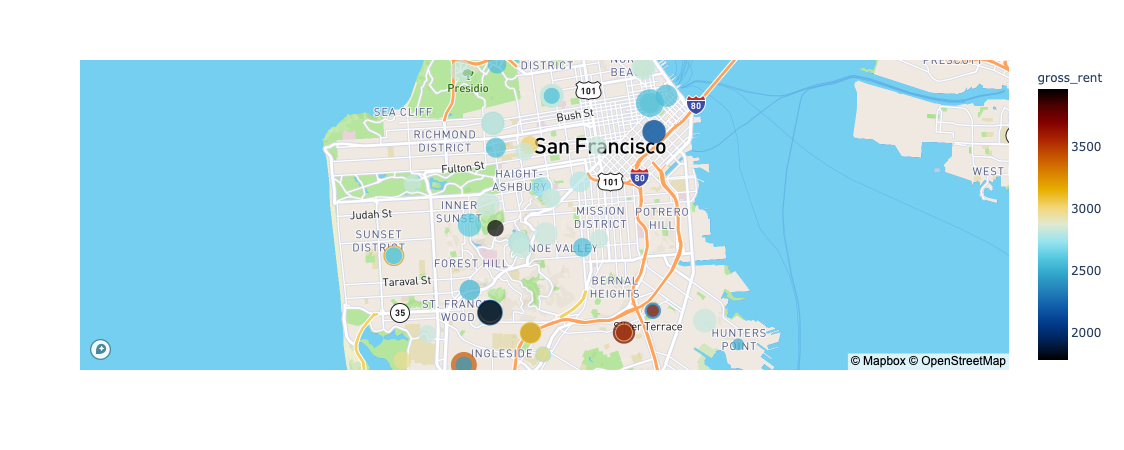

In [191]:
# Set the mapbox access token
px.set_mapbox_access_token(map_box_api)

# Create a scatter mapbox to analyze neighborhood info
map_1 = px.scatter_mapbox(
    neighborhood_coords,
    lat="Lat",
    lon="Lon",
    hover_name="Neighborhood",
    color="gross_rent",
    size="sale_price_sqr_foot",
    color_continuous_scale=px.colors.cyclical.IceFire,
    mapbox_style="streets",
    zoom=11,
)
map_1

- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to create visualizations that investors can use to interactively filter and explore various factors related to the house value of the San Francisco's neighborhoods. 

### Create a DataFrame showing the most expensive neighborhoods in San Francisco by year

In [162]:
# Fetch the data from all expensive neighborhoods per year.
# top_10_neighborhoods.reset_index(inplace=True)
df_expensive_neighborhoods_per_year = sfo_data[sfo_data["neighborhood"].isin(top_10_neighborhoods["neighborhood"])]
df_expensive_neighborhoods_per_year.reset_index(inplace=True)
df_expensive_neighborhoods_per_year.head()

year      neighborhood  sale_price_sqr_foot  housing_units  gross_rent
0  2010        Cow Hollow           569.379968         372560        1239
1  2010     Miraloma Park           680.608729         372560        1239
2  2010   Pacific Heights           496.516014         372560        1239
3  2010      Potrero Hill           491.450004         372560        1239
4  2010  Presidio Heights           549.417931         372560        1239

### Create a parallel coordinates plot and parallel categories plot of most expensive neighborhoods in San Francisco per year


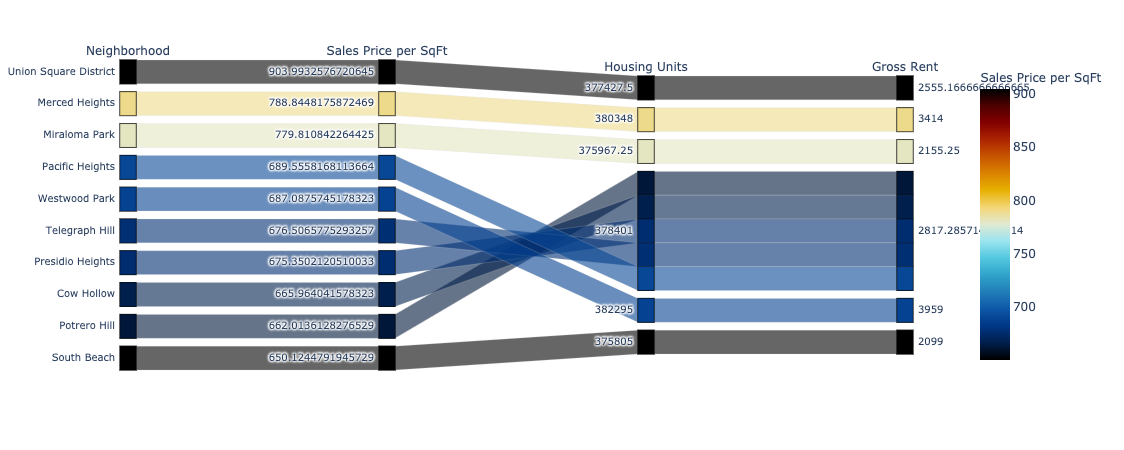

In [189]:
# Parallel Categories Plot
px.parallel_categories(
    top_10_neighborhoods,
    color="sale_price_sqr_foot",
    color_continuous_scale=px.colors.cyclical.IceFire,
    labels={
        "neighborhood":"Neighborhood",
        "sale_price_sqr_foot":"Sales Price per SqFt",
        "housing_units":"Housing Units",
        "gross_rent":"Gross Rent"
    }
)

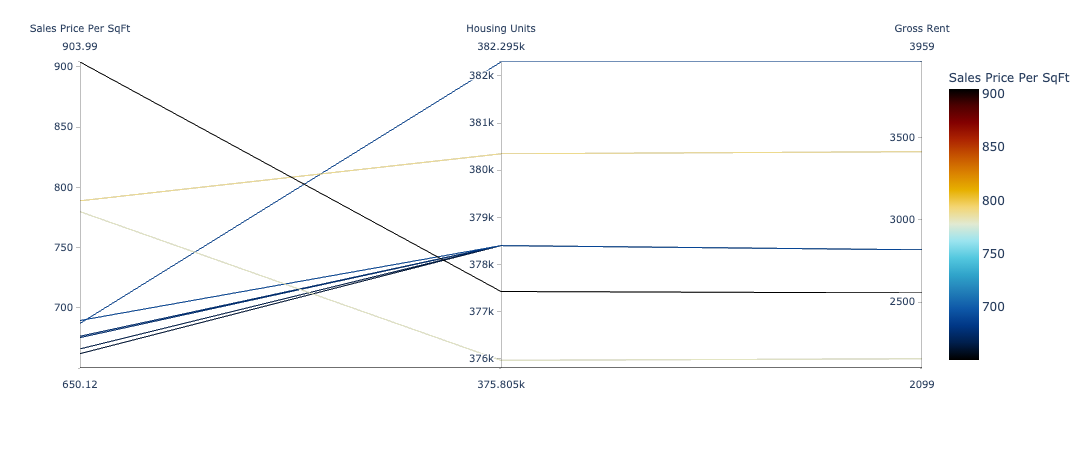

In [188]:
# Parallel Coordinates Plot
px.parallel_coordinates(
    top_10_neighborhoods,
    color="sale_price_sqr_foot",
    color_continuous_scale=px.colors.cyclical.IceFire,
    labels={
        "sale_price_sqr_foot":"Sales Price Per SqFt",
        "housing_units":"Housing Units",
        "gross_rent":"Gross Rent"
    }
)

### Create a sunburst chart to conduct a costs analysis of most expensive neighborhoods in San Francisco per year

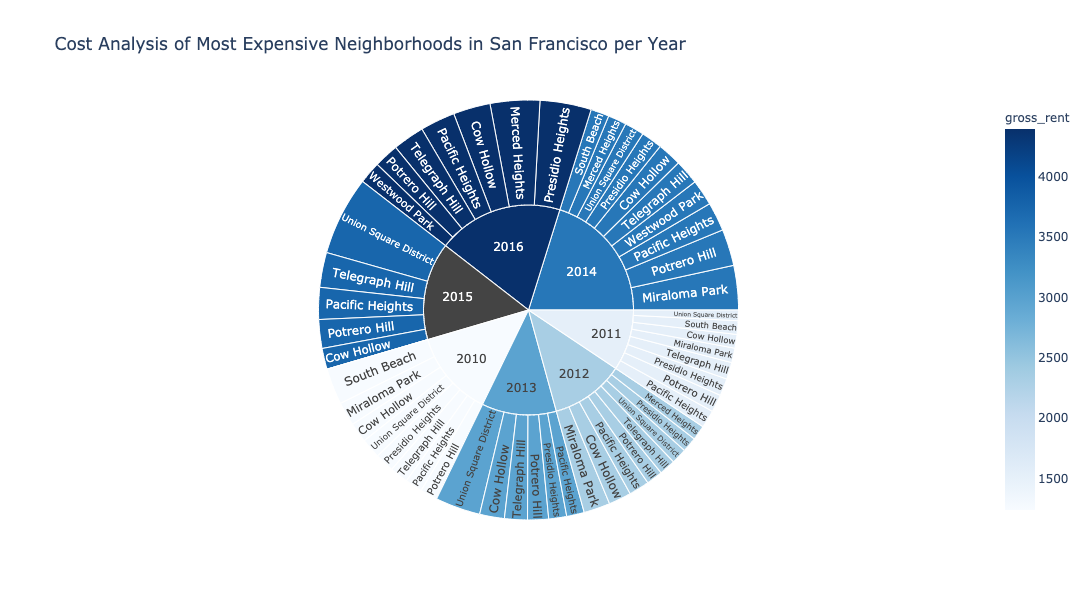

In [187]:
# Sunburst Plot
px.sunburst(
    df_expensive_neighborhoods_per_year,
    path=["year","neighborhood"],
    values="sale_price_sqr_foot",
    color="gross_rent",
    color_continuous_scale=px.colors.sequential.Blues,
    height=600,
    title="Cost Analysis of Most Expensive Neighborhoods in San Francisco per Year"
)